# MALIS 19.3 WPM_T9.2
# Datenanalyse der offenen Daten der Seattle Public Library (Checkouts), Teil 2: Frage 5
Mit fünf verschiedenen Fragen werden die Checkout-Daten analysiert und die Lösungen implementiert. Hierfür werden die Checkout-Daten der Public Library des Jahres 2019 importiert. Für Frage 1 bis 4 wurde die Datenmenge auf 10.000 Zeilen begrenzt (Teil 1).
Für die 5. und letzte Frage soll ein längerer Zeitraum betrachtet werden, und zwar das 2. Halbjahr 2019 (Monate Juli bis Dezember). Durch Ausprobieren konnte ich ermitteln, dass für diesen Zeitraum 1.294.539 Zeilen benötigt werden. Dadurch sind die sechs Monate vergleichbar.

### Wie bin ich an die Zahl 1.294.539 für Juli bis Dezember 2019 gelangt?
Da die Seattle Public Library über sehr hohe Checkouts verfügt, habe ich den Datensatz probeweise mit 1.500.000 Zeilen runtergeladen. Mit dem Befehl "ausleihen.groupby('checkoutmonth')['checkouts'].count()" konnte ich sehen, wie viele Checkouts noch von Juni 2019 enthalten waren. Die Zahl habe ich einfach von der Summe der Checkouts Juli bis Dezember abgezogen.

Ich beschränke mich in Frage 5 auf das 2. Halbjahr, weil mein Computer bei noch mehr Datensätzen noch länger zum Laden und dem späteren, mehrfachen "Restart & Run All" benötigt hätte und auch ein Halbjahr bereits sehr aussagekräftig ist.

## 5. Frage: Wie ist die Entwicklung der Ausleihzahlen von Juli bis Dezember 2019?

In [1]:
# Als Erstes alle benötigten Packages downloaden:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Checkout-Daten downloaden:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=1294539"
spl_file = "checkouts.csv"

In [3]:
urllib.request.urlretrieve(url, spl_file)

('checkouts.csv', <http.client.HTTPMessage at 0x7f202a33edd0>)

### Bevor ich die Frage beantworte, möchte ich mir den Bestand von 6 Monaten etwas näher anschauen:

In [4]:
# Variable erstellen:
ausleihen = pd.read_csv(spl_file)

In [5]:
# Die ersten 5 (Dezember) und die letzten 5 (Juli) Datensätze des 2. Halbjahres 2019 anzeigen: 
ausleihen

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
1294534,Digital,OverDrive,EBOOK,2019,7,2,Who Was Genghis Khan?,Nico Medina,"Biography & Autobiography, History, Juvenile N...","Penguin Group (USA), Inc.",2014
1294535,Digital,OverDrive,EBOOK,2019,7,4,William Wenton and the Lost City,Bobbie Peers,"Fantasy, Humor (Fiction), Juvenile Fiction, My...","Simon & Schuster, Inc.",2019
1294536,Physical,Horizon,BOOK,2019,7,1,Behind the sulfa drugs; a shory history of che...,"Galdston, Iago, 1895-",Chemotherapy,"Appleton,",1943.
1294537,Physical,Horizon,BOOK,2019,7,2,Designer crochet : 32 patterns to elevate your...,"Mullett-Bowlsby, Shannon",Crocheting Patterns,"Lark,",2015.


In [6]:
# Wie lautet die Zahl der höchsten Ausleihe im 2. Halbjahr 2019? (Im Vergleich mit Frage 1: im Dezember 560)
ausleihen.checkouts.max()

1684

In [7]:
# Welches Medium hatte 1.684 Ausleihen im 2. Halbjahr 2019?
checkmax = ausleihen.checkouts.max()
ausleihen[ausleihen.checkouts >= checkmax]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
512327,Physical,Horizon,MIXED,2019,10,1684,FlexTech--Laptops.,NaN,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].


### Überraschendes Ergebnis: Kein Medium wurde am meisten ausgeliehen, sondern ein Laptop!

In [8]:
# Entwicklung Anzahl Ausleihen von Juli bis Dezember 2019 mit "groupby":
ausleihen.groupby('checkoutmonth')['checkouts'].count()

checkoutmonth
7     224092
8     222068
9     213783
10    214673
11    211946
12    207977
Name: checkouts, dtype: int64

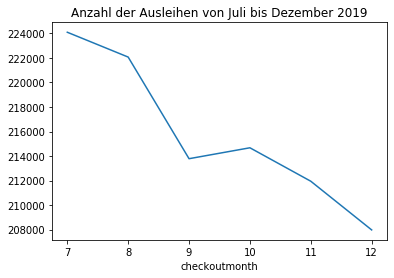

In [11]:
# Die Entwicklung der Ausleihzahlen übersichlich als Liniendiagramm plotten:
ausleihen.groupby('checkoutmonth')['checkouts'].count().plot()
plt.title('Anzahl der Ausleihen von Juli bis Dezember 2019')
plt.show()

## Antwort auf die 5. Frage: Die Ausleihzahlen verringern sich von 224.092 Ausleihen im Juli auf 207.977 Ausleihen im Dezember 2019. Die Differenz der Ausleihen beträgt 16115 Checkouts.